# Data Wrangling 

Raw data from CSV file will be read into a dataframe and cleaned.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read file into dataframe

In [2]:
#Set option so all columns can be seen for exploratory data analysis
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#training data set will have another column for TARGET: 0 if loan repaid, 1 if not
test = pd.read_csv('home_credit_application_test.csv')
train = pd.read_csv('home_credit_application_train.csv')

train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Initial Exploratory Data Analysis
- Check for missing values
- Descriptive statistics for each column
- Target variable analysis

In [3]:
train.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Check rate of loan default in training set

In [5]:
def default_rate(df, col):
    print(df[col].value_counts())
    paid = (df[col].value_counts()[0])/(df[col].value_counts()[0]+df[col].value_counts()[1])
    print("Loan Repaid on Time:", round(paid*100,2),"%")
    print("Loan Defaulted:", round((1-paid)*100,2),"%")
    
default_rate(train, 'TARGET')

0    282686
1     24825
Name: TARGET, dtype: int64
Loan Repaid on Time: 91.93 %
Loan Defaulted: 8.07 %


This is an imbalanced class problem as there are far more loans repaid on time than loans in default.
We can remove some of the majority class by removing rows that have null values

### Check for anomalous values

Note that features describing time elapsed are represented in negative days. The function check_days will convert these features into years elapsed for clarity. It will also create a boxplot for outlier analysis.

                YEAR
count  307511.000000
mean       43.936973
std        11.956133
min        20.517808
25%        34.008219
50%        43.150685
75%        53.923288
max        69.120548


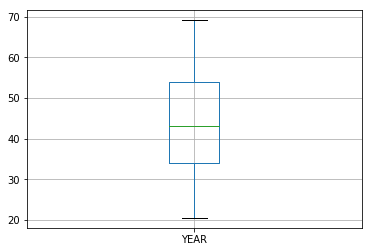

In [6]:
#Check for any odd figures for age (DAYS_BIRTH)

def check_days(df, col):
    t = pd.DataFrame()
    t['YEAR'] = (df[col]/-365)
    print(t.describe())
    t.boxplot(column = ['YEAR'])

check_days(train, 'DAYS_BIRTH')

Applicant age range is from 20 to 69 years old, which does not indicate any abnormal values.

                YEAR
count  307511.000000
mean     -174.835742
std       387.056895
min     -1000.665753
25%         0.791781
50%         3.323288
75%         7.561644
max        49.073973


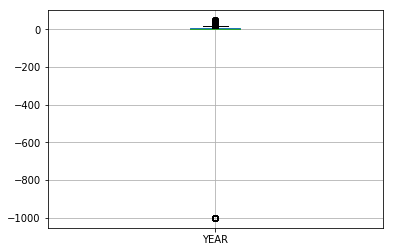

In [7]:
#Check for any odd figures for days of employment

check_days(train, 'DAYS_EMPLOYED')

The minimum age for years of employment is -1000, which does not make any sense. This indicates an error in data entry and will need to be examined further.

In [8]:
len(train[train['DAYS_EMPLOYED']>0])


55374

There are 55374 rows with erroneous values. We will remove these rows from the data set.

In [9]:
train_sub = train[train['DAYS_EMPLOYED'] <= 0]
len(train_sub)

252137

                YEAR
count  252137.000000
mean        6.531971
std         6.406466
min        -0.000000
25%         2.101370
50%         4.515068
75%         8.698630
max        49.073973


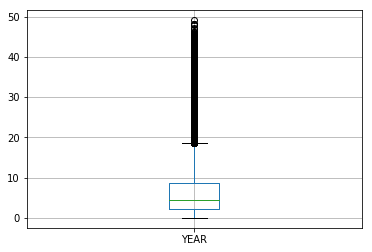

In [10]:
#Sanity Check - days employed (converted to years by function)
check_days(train_sub, 'DAYS_EMPLOYED')

### Dtype Examination

In [11]:
train_sub.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [12]:
train_sub.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [13]:
train_sub.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Remove rows where gender (CODE_GENDER) is not Male ('M') or Female ('F')

In [14]:
train_sub = train_sub[train_sub.CODE_GENDER.isin(['M', 'F'])]

In [15]:
len(train_sub[(train_sub.NAME_TYPE_SUITE.isnull()) & (train_sub.TARGET == 1)])

61

In [16]:
train_sub.apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                      252133
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2266
AMT_CREDIT                        5331
AMT_ANNUITY                      13190
AMT_GOODS_PRICE                    894
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     7
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       16513
DAYS_EMPLOYED                    12573
DAYS_REGISTRATION                14419
DAYS_ID_PUBLISH                   6140
OWN_CAR_AGE                         59
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

                YEAR
count  252133.000000
mean        7.672975
std         4.151686
min        -0.000000
25%         4.073973
50%         7.906849
75%        11.443836
max        19.717808


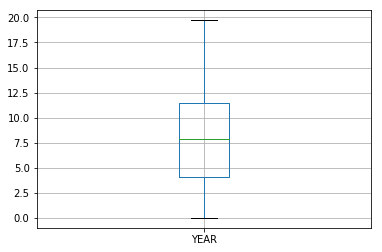

In [17]:
check_days(train_sub, 'DAYS_ID_PUBLISH')

In [19]:
default_rate(train, 'TARGET')
default_rate(train_sub, 'TARGET')


0    282686
1     24825
Name: TARGET, dtype: int64
Loan Repaid on Time: 91.93 %
Loan Defaulted: 8.07 %
0    230298
1     21835
Name: TARGET, dtype: int64
Loan Repaid on Time: 91.34 %
Loan Defaulted: 8.66 %


In [20]:
train_sub[train_sub.TARGET == 1].info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21835 entries, 0 to 307509
Data columns (total 122 columns):
SK_ID_CURR                      21835 non-null int64
TARGET                          21835 non-null int64
NAME_CONTRACT_TYPE              21835 non-null object
CODE_GENDER                     21835 non-null object
FLAG_OWN_CAR                    21835 non-null object
FLAG_OWN_REALTY                 21835 non-null object
CNT_CHILDREN                    21835 non-null int64
AMT_INCOME_TOTAL                21835 non-null float64
AMT_CREDIT                      21835 non-null float64
AMT_ANNUITY                     21835 non-null float64
AMT_GOODS_PRICE                 21816 non-null float64
NAME_TYPE_SUITE                 21774 non-null object
NAME_INCOME_TYPE                21835 non-null object
NAME_EDUCATION_TYPE             21835 non-null object
NAME_FAMILY_STATUS              21835 non-null object
NAME_HOUSING_TYPE               21835 non-null object
REGION_POPULATION_RELATI

Check for null values in applicants who have defaulted (TARGET = 1)

In [21]:
train_sub[train_sub.TARGET == 1].isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                    19
NAME_TYPE_SUITE                    61
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     14753
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

### Missing Value Treatment

In [22]:
#Replace all null values with 0
train_sub['OWN_CAR_AGE'].describe()

count    94411.000000
mean        11.950218
std         11.982072
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64

In [23]:
train_sub['LIVINGAREA_AVG'].describe()

count    126221.000000
mean          0.108037
std           0.111305
min           0.000000
25%           0.045600
50%           0.074700
75%           0.131000
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64

In [24]:
train_sub.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252133.000000,252133.000000,252133.000000,2.521330e+05,2.521330e+05,252121.000000,2.518770e+05,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,94411.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252131.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.00000,252133.000000,252133.000000,252133.000000,252133.000000,121274.000000,2.516290e+05,202237.000000,124798.000000,105121.000000,129793.000000,84755.000000,76249.000000,118356.000000,125784.000000,127277.000000,81337.000000,102993.000000,80071.000000,126221.000000,77375.000000,113635.000000,124798.000000,105121.000000,129793.000000,84755.000000,76249.000000,118356.000000,125784.000000,127277.000000,81337.000000,102993.000000,80071.000000,126221.000000,77375.000000,113635.000000,124798.000000,105121.000000,129793.000000,84755.000000,76249.000000,118356.000000,125784.000000,127277.000000,81337.000000,102993.00000,80071.000000,126221.000000,77375.000000,113635.000000,131081.000000,251284.000000,251284.000000,251284.000000,251284.000000,252132.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,218277.000000,218277.000000,218277.000000,218277.000000,218277.000000,218277.000000
mean,278115.872266,0.086601,0.498511,1.759139e+05,6.114018e+05,27812.449610,5.494077e+05,0.020894,-14769.152336,-2384.142254,-4635.438761,-2800.635795,11.950218,0.999996,0.999952,0.243138,0.997874,0.277671,0.063502,2.252516,2.044611,2.023329,12.203274,0.017241,0.06192,0.049589,0.089770,0.281070,0.218992,0.481905,5.161376e-01,0.500345,0.118263,0.088491,0.977498,0.752777,0.045065,0.079558,0.149531,0.227358,0.233093,0.066690,0.101649,0.108037,0.008914,0.028773,0.114965,0.087548,0.976807,0.759894,0.043006,0.075035,0.144953,0.223323,0.229219,0.065285,0.106541,0.106537,0.008182,0.027405,0.118673,0.088009,0.977518

In [25]:
train_sub.shape

(252133, 122)

We will split training set into two dataframes and examine null values.
- Non-Defaulters (Target = 0)
- Defaulters (Target = 1)

In [26]:
non_default = train_sub[train_sub['TARGET'] == 0]
default = train_sub[train_sub['TARGET'] == 1]

In [27]:
#Check for all null values in non-default data set 
non_default.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    237
NAME_TYPE_SUITE                   1035
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     142969
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

Drop rows where there are null values in COMMONAREA_AVG

In [28]:
non_default = non_default.dropna(subset = ['COMMONAREA_AVG'], how = 'any')

Combine separate dataframes and check shape for each target value.

In [29]:
combined = non_default.append(default, ignore_index = True)

In [30]:
print(combined[combined.TARGET == 0].shape)
print(combined[combined.TARGET == 1].shape)

(70621, 122)
(21835, 122)


Check all remaining null values in order from most missing.

In [31]:
combined.isnull().sum().sort_values(ascending = False)

OWN_CAR_AGE                     59386
EXT_SOURCE_1                    46668
FONDKAPREMONT_MODE              19695
NONLIVINGAPARTMENTS_MODE        19274
NONLIVINGAPARTMENTS_MEDI        19274
NONLIVINGAPARTMENTS_AVG         19274
EXT_SOURCE_3                    18186
FLOORSMIN_MODE                  18018
FLOORSMIN_AVG                   18018
FLOORSMIN_MEDI                  18018
LIVINGAPARTMENTS_MEDI           17768
LIVINGAPARTMENTS_AVG            17768
LIVINGAPARTMENTS_MODE           17768
LANDAREA_MEDI                   17496
LANDAREA_MODE                   17496
LANDAREA_AVG                    17496
YEARS_BUILD_MEDI                16579
YEARS_BUILD_AVG                 16579
YEARS_BUILD_MODE                16579
COMMONAREA_AVG                  16207
COMMONAREA_MODE                 16207
COMMONAREA_MEDI                 16207
BASEMENTAREA_AVG                15937
BASEMENTAREA_MEDI               15937
BASEMENTAREA_MODE               15937
OCCUPATION_TYPE                 15265
NONLIVINGARE

In [32]:
#create dataframe copy in case things go awry
combined2 = combined.copy()

### Missing data imputation
The following methods will be used for the remaining null values:
- Mean imputation
- Zero imputation
- Mode imputation
- Each categorical variable will be evaluated and imputed based on judgment

In [33]:
#Fill null values in following columns with mean (average) value
combined.loc[:, 'APARTMENTS_AVG':'NONLIVINGAREA_MEDI'] = combined.loc[:, 'APARTMENTS_AVG':'NONLIVINGAREA_MEDI'].apply(lambda x: x.fillna(x.mean(), axis = 0)) 

In [34]:
combined.loc[:, 'OBS_30_CNT_SOCIAL_CIRCLE':'DEF_60_CNT_SOCIAL_CIRCLE'] = combined.loc[:, 'OBS_30_CNT_SOCIAL_CIRCLE':'DEF_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: x.fillna(x.mean(), axis = 0)) 

In [35]:
#Fill null values in following columns with 0
combined.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'] = combined.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [36]:
combined['OWN_CAR_AGE'].fillna(0, inplace = True)
combined['FONDKAPREMONT_MODE'].fillna('not specified', inplace = True)
combined['OCCUPATION_TYPE'].fillna('Others', inplace = True)
combined['WALLSMATERIAL_MODE'].fillna('Others', inplace = True)
combined['NAME_TYPE_SUITE'].fillna('Others', inplace = True)

In [37]:
combined.isnull().sum().sort_values(ascending = False)

EXT_SOURCE_1                    46668
EXT_SOURCE_3                    18186
HOUSETYPE_MODE                  12580
TOTALAREA_MODE                  12073
EMERGENCYSTATE_MODE             11872
EXT_SOURCE_2                      168
AMT_GOODS_PRICE                    75
AMT_ANNUITY                         3
CNT_FAM_MEMBERS                     1
ORGANIZATION_TYPE                   0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
LANDAREA_AVG                        0
NONLIVINGAPARTMENTS_AVG             0
FLOORSMIN_AVG                       0
LIVINGAREA_AVG                      0
LIVINGAPARTMENTS_AVG                0
BASEMENTAREA_AVG                    0
YEARS_BEGINEXPLUATATION_AVG         0
YEARS_BUILD_

In [38]:
combined.shape

(92456, 122)

In [39]:
combined.dropna(subset = ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS'], inplace = True)

In [40]:
combined.shape

(92378, 122)

In [41]:
#Replace missing values with mode
combined['EMERGENCYSTATE_MODE'].fillna('No', inplace = True)

In [42]:
combined.shape

(92378, 122)

In [43]:
combined.isnull().sum().sort_values(ascending = False)

EXT_SOURCE_1                    46634
EXT_SOURCE_3                    18170
HOUSETYPE_MODE                  12569
TOTALAREA_MODE                  12062
EXT_SOURCE_2                      168
AMT_REQ_CREDIT_BUREAU_YEAR          0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                   0
APARTMENTS_AVG                      0
BASEMENTAREA_MODE                   0
BASEMENTAREA_AVG                    0
YEARS_BEGINEXPLUATATION_AVG         0
YEARS_BUILD_AVG                     0
COMMONAREA_AVG                      0
ELEVATORS_AVG                       0
ENTRANCES_AVG                       0
FLOORSMAX_AVG                       0
FLOORSMIN_AVG                       0
LANDAREA_AVG                        0
LIVINGAPARTM

In [44]:
combined.reset_index(drop = True, inplace = True)

In [45]:
combined['HOUSETYPE_MODE'].value_counts()

block of flats      78669
specific housing      637
terraced house        503
Name: HOUSETYPE_MODE, dtype: int64

In [46]:
#Since block of flats is an overwhelming majority, replace null values with block of flats
combined['HOUSETYPE_MODE'].fillna('block of flats', inplace = True)

In [47]:
#Check mean for each house type
combined['TOTALAREA_MODE'].groupby(combined['HOUSETYPE_MODE']).mean()

HOUSETYPE_MODE
block of flats      0.112535
specific housing    0.065816
terraced house      0.035844
Name: TOTALAREA_MODE, dtype: float64

In [48]:
#Save mean total area for block of flats and impute missing values
block_mean = combined['TOTALAREA_MODE'].groupby(combined['HOUSETYPE_MODE']).mean()[0]
combined['TOTALAREA_MODE'].fillna(block_mean, inplace = True)

All missing values have been imputed. Next, we will move on to dealing with outliers as our final step in data wrangling.

### Outlier Treatment

In [49]:
combined.describe(percentiles = [.1,.5,.99])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,92378.000000,92378.000000,92378.000000,9.237800e+04,9.237800e+04,92378.000000,9.237800e+04,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.0,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,45744.000000,9.221000e+04,74208.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000
mean,278135.968434,0.236160,0.477874,1.859438e+05,6.258470e+05,28572.125793,5.596123e+05,0.022490,-14741.235370,-2340.203165,-4749.454329,-2786.317770,4.188432,1.0,0.999924,0.223170,0.997618,0.292342,0.072008,2.206478,2.011691,1.968001,12.223018,0.015014,0.058098,0.048377,0.056983,0.180357,0.145652,0.483255,5.128695e-01,0.482438,0.124388,0.088827,0.980755,0.752984,0.045063,0.081433,0.152690,0.237645,0.234437,0.066065,0.101993,0.114635,0.008830,0.025269,0.120158,0.087302,0.980035,0.759942,0.043003,0.076084,0.147332,0.232862,0.230354,0.064234,0.106837,0.112193,0.008070,0.023350,0.124679,0.088259,0.980736,0.756272,0.045055,0.080403,0.152061,0.237209,0.234201,0.066825,0.103172,0.115824,0.008661,0.0

Remove rows where number of children is greater than 4.

In [50]:
combined.drop(combined[combined['CNT_CHILDREN']>4].index, inplace = True)

Drop bottom 5 percentile and top 5 percentile of values for AMT_INCOME_TOTAL

In [51]:
combined.drop(combined[combined.AMT_INCOME_TOTAL>np.percentile(combined.AMT_INCOME_TOTAL,95)].index, inplace = True)
combined.drop(combined[combined.AMT_INCOME_TOTAL<np.percentile(combined.AMT_INCOME_TOTAL,5)].index, inplace = True)

In [52]:
#Reset Index
combined.reset_index(drop = True, inplace = True)

In [53]:
combined.index

RangeIndex(start=0, stop=84398, step=1)

In [54]:
print(combined.AMT_INCOME_TOTAL.min())
print(combined.AMT_INCOME_TOTAL.max())

76500.0
360000.0


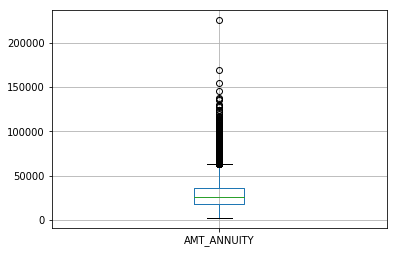

In [55]:
combined.boxplot(column = ['AMT_ANNUITY'])

Remove top percentile of AMT_ANNUITY

In [56]:
combined.drop(combined[combined.AMT_ANNUITY>np.percentile(combined.AMT_ANNUITY,99)].index, inplace = True)
combined.reset_index(drop = True, inplace = True)

Check summary statistics for all columns with specific percentiles

In [57]:
combined.describe(percentiles = [.01,.25,.5,.75,.99])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,83555.000000,83555.000000,83555.000000,83555.000000,8.355500e+04,83555.000000,8.355500e+04,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.0,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,41388.000000,8.340100e+04,67353.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.00000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.0,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000,83555.000000
mean,278289.411693,0.237389,0.471007,173371.254427,6.117339e+05,27735.028562,5.452710e+05,0.022022,-14720.496523,-2334.093459,-4765.719969,-2785.703979,4.245347,1.0,0.999928,0.219532,0.997941,0.288373,0.070265,2.195715,2.022225,1.978314,12.205422,0.014446,0.055855,0.046245,0.057555,0.182215,0.146742,0.479122,5.112135e-01,0.481221,0.123511,0.088428,0.980659,0.752385,0.044464,0.079617,0.152776,0.235101,0.232567,0.066507,0.101292,0.113491,0.008687,0.024675,0.119462,0.087034,0.979940,0.759409,0.042574,0.074545,0.147523,0.230486,0.228644,0.064702,0.106267,0.111263,0.007956,0.022902,0.123816,0.087900,0.980638,0.755683,0.044479,0.078635,0.152161,0.234681,0.232345,0.067272,0.102499,0.114687,0.008533,0.024410

In [58]:
combined.AMT_GOODS_PRICE.sort_values(ascending = False).tail(20)

23984    45000.0
4296     45000.0
23978    45000.0
20640    45000.0
41726    45000.0
61968    45000.0
11164    45000.0
3372     45000.0
43253    45000.0
39802    45000.0
12312    45000.0
3362     45000.0
4671     45000.0
17014    45000.0
50183    45000.0
55407    45000.0
31493    45000.0
6343     45000.0
29491    45000.0
15007    45000.0
Name: AMT_GOODS_PRICE, dtype: float64

Remove top and bottom percentile of AMT_CREDIT and reset index

In [59]:
combined.drop(combined[combined.AMT_CREDIT>np.percentile(combined.AMT_CREDIT,99)].index, inplace = True)
combined.drop(combined[combined.AMT_CREDIT<np.percentile(combined.AMT_CREDIT,1)].index, inplace = True)
combined.reset_index(drop = True, inplace = True)

In [60]:
combined.OWN_CAR_AGE.value_counts()

0.0     53626
7.0      2077
6.0      1807
3.0      1789
8.0      1712
2.0      1658
4.0      1541
1.0      1519
9.0      1436
10.0     1342
13.0     1314
14.0     1281
12.0     1228
11.0     1160
5.0      1000
15.0      972
16.0      895
64.0      794
17.0      784
18.0      593
19.0      491
20.0      410
21.0      383
22.0      323
65.0      301
23.0      283
24.0      267
25.0      206
26.0      129
28.0      129
27.0      107
29.0       80
30.0       61
31.0       48
32.0       39
33.0       31
35.0       31
34.0       31
36.0       23
40.0       20
38.0       19
37.0       16
39.0       14
42.0       10
41.0        9
43.0        5
49.0        2
46.0        2
63.0        1
57.0        1
91.0        1
45.0        1
44.0        1
Name: OWN_CAR_AGE, dtype: int64

Remove rows where OWN_CAR_AGE > 30 as this is highly unlikely

In [61]:
combined.drop(combined[combined['OWN_CAR_AGE']>30].index, inplace = True)
combined.reset_index(drop = True, inplace = True)

Imbalanced classes - ratio is ~76% non-defaulters to ~24% defaulters, or 3:1

In [62]:
print(len(combined[combined.TARGET==0]))
print(len(combined[combined.TARGET==1]))

61372
19231


In [63]:
combined.describe(percentiles = [.01,.25,.5,.75,.99])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,80603.000000,80603.000000,80603.000000,80603.000000,8.060300e+04,80603.000000,8.060300e+04,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.0,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,39869.000000,8.045500e+04,64910.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.0,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000,80603.000000
mean,278253.089165,0.238589,0.470231,173179.078071,6.050775e+05,27695.008176,5.390430e+05,0.021995,-14731.059737,-2336.392417,-4767.500404,-2784.692567,3.311924,1.0,0.999926,0.220463,0.997916,0.288612,0.069923,2.196109,2.023845,1.979567,12.199968,0.014540,0.055742,0.046028,0.057727,0.182189,0.146645,0.478860,5.106842e-01,0.481121,0.123523,0.088445,0.980649,0.752404,0.044436,0.079628,0.152774,0.235084,0.232498,0.066529,0.101320,0.113473,0.008710,0.024681,0.119464,0.087036,0.979938,0.759405,0.042551,0.074538,0.147505,0.230454,0.228567,0.064705,0.106302,0.111223,0.007981,0.022915,0.123836,0.087918,0.980626,0.755697,0.044456,0.078642,0.152157,0.234666,0.232280,0.067296,0.102543,0.114661,0.008561,0.02442

There are some remaining outliers in the credit inquiry columns (AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,
AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR) that might hold value in future predictions.
We will leave this in for now and do further analysis when doin exploratory data analysis.

Before exporting cleaned dataframe to a CSV file, change row values that contain a comma.

In [64]:
combined.WALLSMATERIAL_MODE.value_counts()

Panel           32149
Stone, brick    28497
Others          12046
Block            4446
Wooden           1824
Mixed             835
Monolithic        806
Name: WALLSMATERIAL_MODE, dtype: int64

In [65]:
combined.loc[combined.WALLSMATERIAL_MODE == 'Stone, brick', 'WALLSMATERIAL_MODE'] = 'Stone/brick'

In [66]:
#Value has been changed
combined.WALLSMATERIAL_MODE.value_counts()

Panel          32149
Stone/brick    28497
Others         12046
Block           4446
Wooden          1824
Mixed            835
Monolithic       806
Name: WALLSMATERIAL_MODE, dtype: int64

### Create CSV file

In [67]:
combined.to_csv('cleaned_train.csv', index = False)